# Programming Exercise 1: Linear Regression


In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Simple functions

In [42]:
# Goal: return an identity matrix:

def warmUpExercise(num):
    A = np.identity(num)
    return A

warmUpExercise(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## 2. Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. The first column is the population of a city (in 10,000s) and the second column is the profit (in $10,000s) of a food truck in that city. A negative value for profit indicates a loss. 

### 2.1 Plotting the Data


In [44]:
data = pd.read_csv('/Users/tess/Downloads/machine-learning-ex1/ex1/ex1data1.txt', header = None, names = ['Population', 'Profit'])
data[0:10]

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


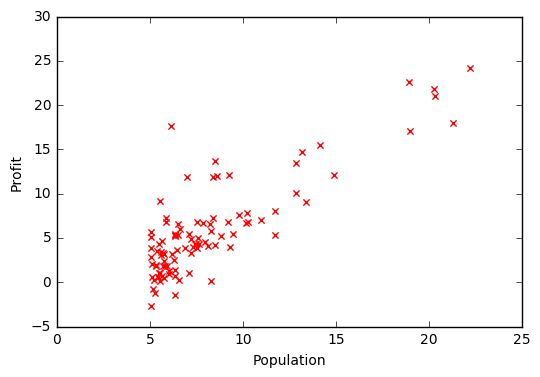

In [40]:
data.plot(kind='scatter', x='Population', y='Profit', marker = 'x', c = 'red')


### 2.2 Gradient Descent
In this part you will fit the linear regression parameters theta to our dataset using gradient descent

#### 2.2.1 Update Equations
#### 2.2.2 Implementation

In [308]:
data = np.loadtxt('/Users/tess/Downloads/machine-learning-ex1/ex1/ex1data1.txt', delimiter=',', usecols = (0,1), unpack = True)

In [312]:
X = np.transpose(np.array(data[:-1]))  # separate into X and y variables
y = np.transpose(np.array(data[-1:]))
m = y.size                             # number of training examples
# add a column of 1's for the theta0 term
X = np.insert(X, 0, 1, axis = 1)

iterations = 1500                      # how many times to repeat
alpha = 0.01                           # learning rate
theta = np.array([[0.],[0.]])          #initialize a theta parameter matrix

X.shape, y.shape, theta.shape

((97, 2), (97, 1), (2, 1))

#### 2.2.3 Computing the cost J(theta)

In [314]:
# how good is the model?
# calculate the error between observed data and predicted data
def computeCost(X, y, theta):
    m = y.size                  # number of training examples
    J = 0                       # initialize cost as 0
    h = np.dot(X, theta)        # linear hypothesis 
    
    inner = np.power((h - y), 2)
    J = np.sum(inner) /(2*m) 
    return J

computeCost(X, y, theta)

32.072733877455676

In [340]:
# run gradient descent: calculate cost, adjust thetas, and iterate

def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size                        # number of training examples
    J_history = np.zeros(num_iters)   # store cost @ each iteration 
    theta_history = []                # store thetas @ each iteration 
   
    for i in range(num_iters):
        J_history[i] = computeCost(X, y, theta)    # calculate & save cost
        theta_history.append(theta)                # save theta
        
        h = np.dot(X, theta)
        shift = (alpha/m)*(np.dot(X.T,(h-y)))      # update theta
        theta = theta - shift
        
    return theta, theta_history, J_history


t, th, jh = gradientDescent(X, y, theta, alpha, iterations)
print 'Theta found by gradient descent: ' + str(t[0][0]) + ' ' + str(t[1][0])

Theta found by gradient descent: -3.6302914394 1.16636235034


(4, 6)

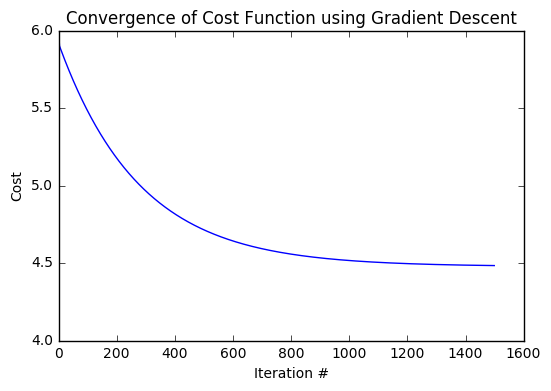

In [341]:
# plot convergence of cost function

plt.plot(range(len(j)), j)
plt.xlabel('Iteration #')
plt.ylabel('Cost')
plt.title('Convergence of Cost Function using Gradient Descent')
plt.ylim(4,6)

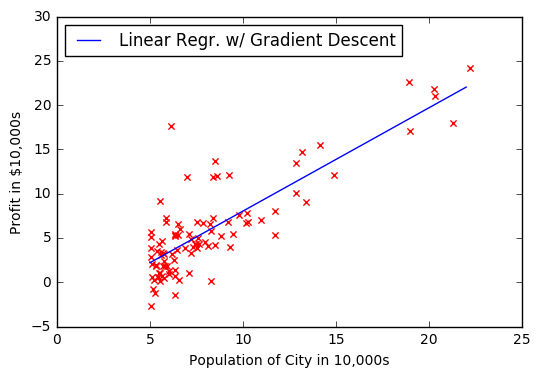

In [362]:
# Plot the linear fit:

x_fit = np.arange(5, 23)
y_fit = t[0] + t[1]*x_fit

plt.scatter(X.T[1], y, c = 'r', marker = 'x')
plt.plot(x_fit, y_fit, label = 'Linear Regr. w/ Gradient Descent')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc = 2)